<a href="https://colab.research.google.com/github/zoebatz/EEL6878/blob/main/Modeling_%26_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os
from networkx import bipartite

In [42]:
# load data
path = '/content/drive/MyDrive/Colab Notebooks/AI_project/ml-100k/ratings.csv'
df_ratings = pd.read_csv(path)
df_ratings = df_ratings.drop('timestamp', axis=1)
df_ratings.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [87]:
len(df_ratings)

100836

In [72]:
len(df_ratings['userId'].unique())

610

In [74]:
len(df_ratings['movieId'].unique())

9724

In [88]:
# modify dataframe user and movie label
df_ratings['userId'] = df_ratings['userId'].apply(lambda x: f'u{x}')
df_ratings['movieId'] = df_ratings['movieId'].apply(lambda x: f'm{x}')
df_ratings.head()

,userId,movieId,rating
0,u1,m1,4.0
1,u1,m3,4.0
2,u1,m6,4.0
3,u1,m47,5.0
4,u1,m50,5.0


In [94]:
B_ratings = nx.Graph()

# add user and movie nodes
users = df_ratings['userId'].unique()
movies = df_ratings['movieId'].unique()

B_ratings.add_nodes_from(users, bipartite='users')
B_ratings.add_nodes_from(movies, bipartite='movies')

# add edges for each user-movie pair
edges = list(zip(df_ratings['userId'], df_ratings['movieId']))
B_ratings.add_edges_from(edges)



In [100]:
B_ratings.number_of_edges() == len(df_ratings)

True

In [102]:
B_ratings.number_of_nodes() == len(df_ratings['userId'].unique()) + len(df_ratings['movieId'].unique())

True

In [103]:
# user - user graph (link if both rated same movie)
user_nodes = [node for node, d in B_ratings.nodes(data=True) if d['bipartite'] == 'users']
# edge weight = number of movies both rated
user_graph = bipartite.weighted_projected_graph(B_ratings, user_nodes)


In [104]:
len(user_nodes)

610

In [105]:
user_graph.size()

164054

In [12]:
!pip install python-louvain

In [106]:
import community.community_louvain as community_louvain

communities = community_louvain.best_partition(user_graph)

In [107]:
# how many communities detected
len(set(communities.values()))

3

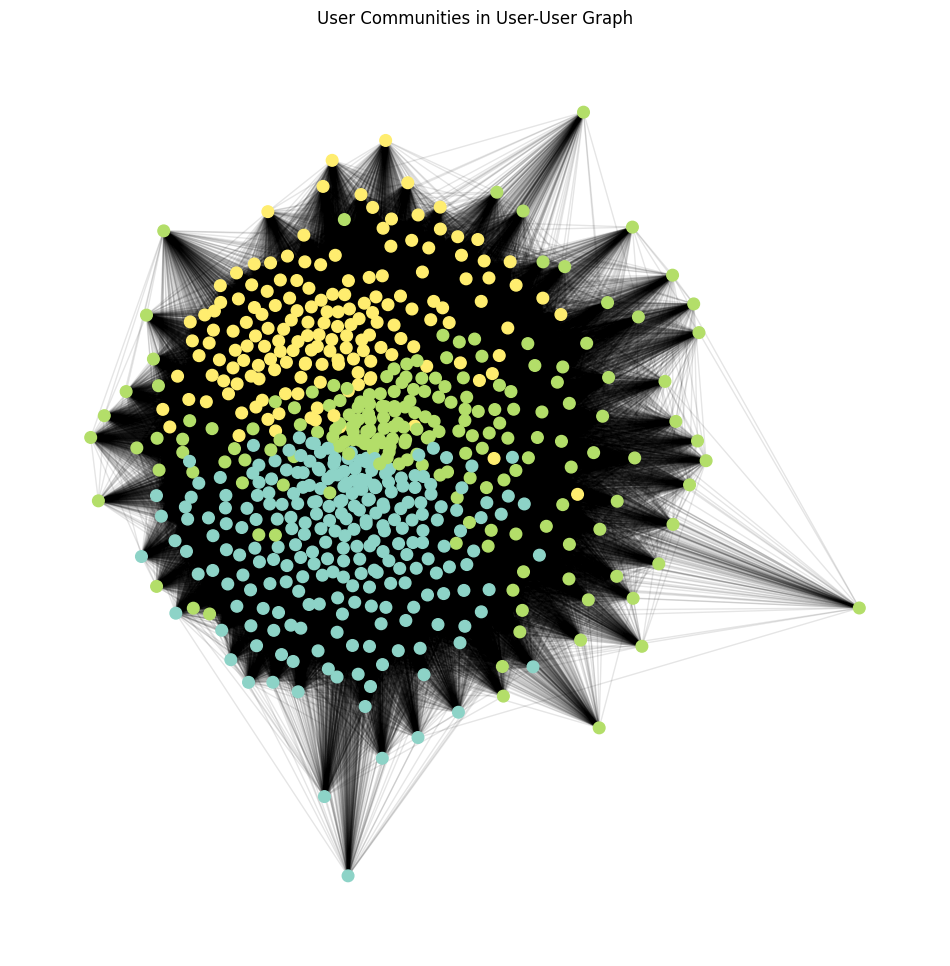

In [120]:
pos = nx.spring_layout(user_graph, seed=42, k=0.35, iterations=1000)
plt.figure(figsize=(12, 12))
node_colors = [communities[n] for n in user_graph.nodes()]
nx.draw_networkx_nodes(user_graph, pos, node_size=70, cmap=plt.cm.Set3, node_color=node_colors)
nx.draw_networkx_edges(user_graph, pos, alpha=0.1)
plt.title("User Communities in User-User Graph")
plt.axis('off')
plt.show()

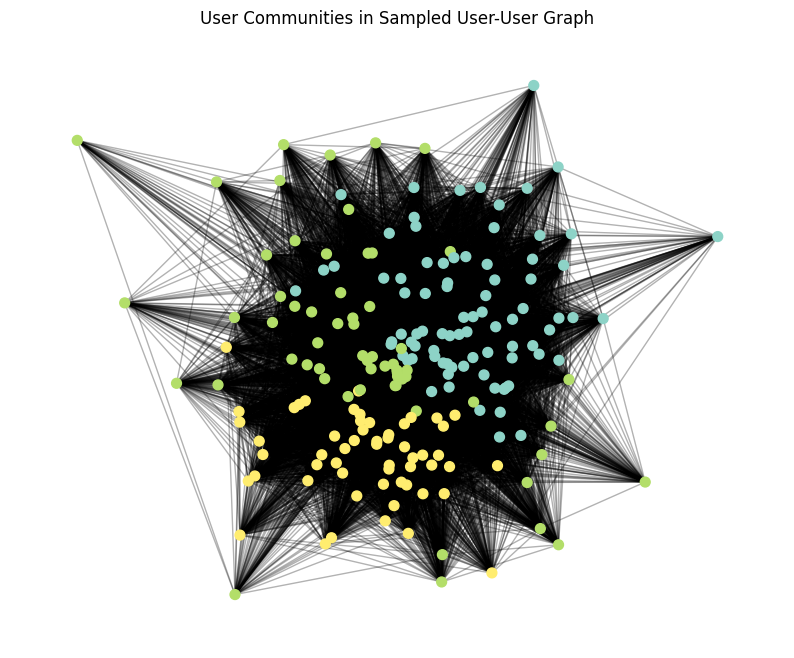